In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# read txt file and split into letters individual letters and symbols
data = []
with open('test.txt', 'r') as f:
    text = f.read() 
    for i in text:
        data.append(i)


In [12]:
# map letters to numbers
letters = []
unique_letters = list(sorted(set(data)))
mapping = dict(zip(unique_letters, range(1, len(unique_letters)+1)))

data_mapped = [mapping[i] for i in data]

(0.0, 100.0)

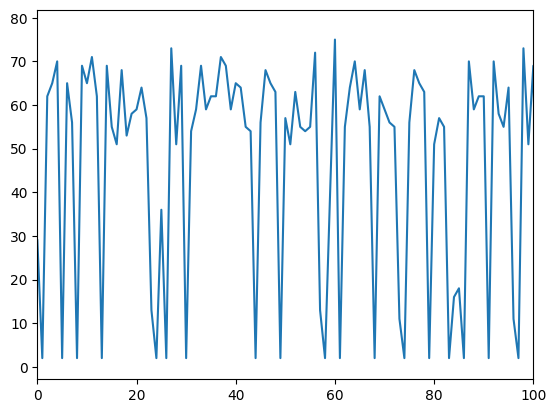

In [16]:
plt.plot(data_mapped)
plt.xlim(0, 100)

In [15]:
temperature = pd.read_csv("/media/dan/Data/git/spacetimeformer/spacetimeformer/data/temperature-v1.csv")

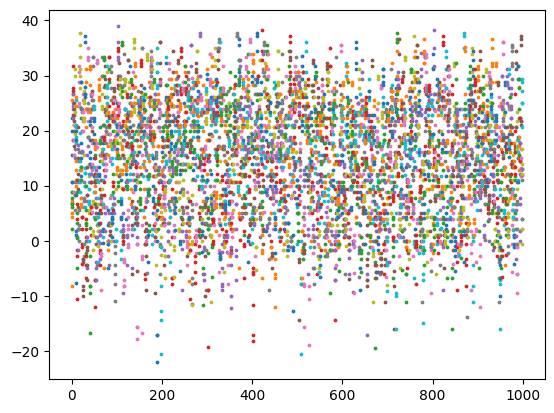

In [26]:
# sample random times and plot the distribution of the temperatures 
values = temperature[["ABI",	"ACT",	"AMA",	"ALB",	"JFK",	"LGA"]].values

x = np.random.randint(0, values.shape[0], values.shape[0])
for i in range(1000):
    y = values[x[i],:]
    plt.scatter([i]*y.shape[0],y, 3)


In [28]:


fs = 2048  # sampling rate (Hz)
T = 10  # length of epochs (s)
f = 100  # frequency of sinusoids (Hz)
t = np.arange(0, T, 1 / fs)
A = 1  # Amplitude
sigma = 0.1  # Gaussian noise variance

# Damping/growth factor
k = 0.1

# Initializing the data array
data = []

# Phase differences for the sine waves
phase_differences = [0, np.pi]
names = ['0 (0°)', 'π (180°)']

# Append dampened sine wave
dampened_wave = A * np.exp(-k * t) * np.sin(2 * np.pi * f * t)
data.append(dampened_wave)

# Append standard and phase-shifted sine waves
for ps in phase_differences:
    # Create the sine wave with phase shift
    sig = np.sin(2 * np.pi * f * t - ps)
    data.append(sig)

data = np.array(data).T

In [31]:
data.shape

(20480, 3)

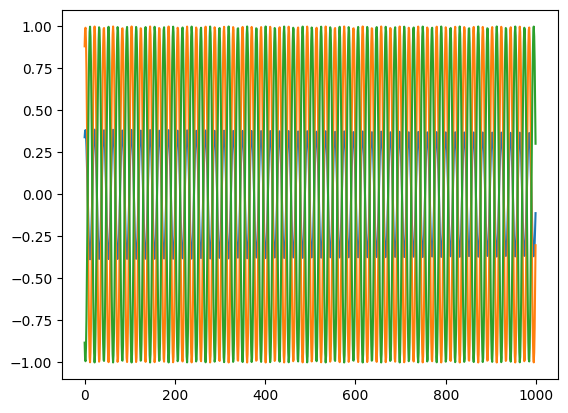

In [35]:
plt.plot(data[-1000:, :])

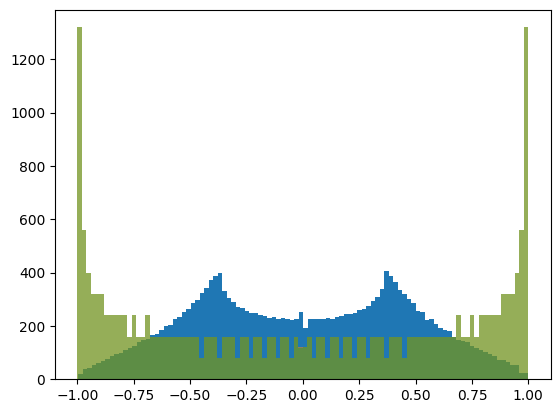

In [41]:
plt.hist(data[:,0], bins=100);
plt.hist(data[:,1], bins=100, alpha=0.5);
plt.hist(data[:,2], bins=100, alpha=0.5);

In [1]:
import numpy as np
import lzma

# Create a NumPy array
array = np.random.rand(100, 100)  # Example array of floats

# Compress
compressed = lzma.compress(array.tobytes())

# Decompress and reconstruct array
decompressed = lzma.decompress(compressed)
array_reconstructed = np.frombuffer(decompressed, dtype=array.dtype).reshape(array.shape)


In [6]:
len(decompressed)

80000

In [5]:
len(compressed)

74080

In [13]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import mne

edf = mne.io.read_raw_edf("/media/dan/Data/data/iEEG/raw_ieeg/patientDumps/FC/CCEPs.EDF")

Extracting EDF parameters from /media/dan/Data/data/iEEG/raw_ieeg/patientDumps/FC/CCEPs.EDF...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [3]:
data = edf.get_data()

In [7]:
original_array = data[0,:2048*4]

# loop through the data and quantize it

In [52]:


# Function to scale array to the range of the given data type
def scale_array(arr, data_type):
    if np.issubdtype(data_type, np.integer):
        factor = 10 ** 6
        return (arr * factor).astype(np.int64)  # Using int64 for demonstration

    else:
        return arr.astype(data_type)
    




In [54]:
test = data * 10**6
test = test.astype(np.int64)
unique_test = np.unique(test)

In [53]:
def normalize_array(arr):
    arr_min, arr_max = arr.min(), arr.max()
    return (arr - arr_min) / (arr_max - arr_min)

# Normalizing original array
normalized_original = normalize_array(original_array)

# data_types = [np.float32,np.float16, np.int32, np.int16, np.int8]
data_types = [np.int32]


for dtype in data_types:

    print(f"Data type: {dtype}")
    quantized_array = scale_array(original_array, dtype)
    normalized_quantized = normalize_array(quantized_array)

    # make new plotly figure
    fig = px.line(x=np.arange(len(normalized_quantized)), y=normalized_quantized, title=f"{dtype}")
    # add original data
    fig.add_scatter(x=np.arange(len(normalized_original)), y=normalized_original, mode="lines")
    fig.show()

Data type: <class 'numpy.int32'>


In [16]:
len(data[0,:])

13383040

In [31]:
total_unique = np.unique(data).shape[0]

In [32]:
total_unique

58964

In [55]:
from tqdm import tqdm

arr = []
for x in tqdm(range(2048,2048*60,2048)):
    uniq = np.unique(test[:,:x])
    arr.append(uniq.shape[0])

100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


In [58]:
unique_test

array([    -78608377,         -8711,         -8710, ..., 3404921858548,
       3405236292057, 3406336809338])

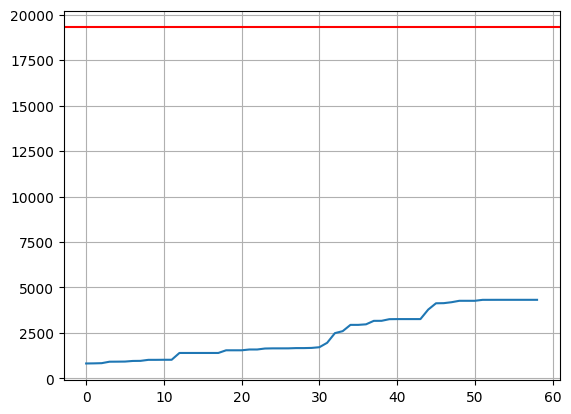

In [59]:
plt.plot(arr)
plt.axhline(len(unique_test), color="red")
plt.grid()